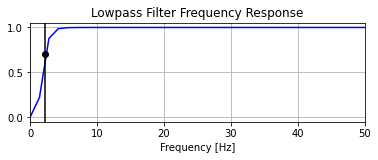

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.fftpack
import librosa
from scipy.signal import butter, lfilter, freqz, sosfreqz, sosfiltfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(highcut, fs, order=1):
    nyq = 0.5 * fs
    high = highcut / nyq
    b = butter(order, high, btype='high', output='sos')
    return b

def butter_highpass_filter(data, highcut, fs, order=1):
    b= butter_highpass(highcut, fs, order=order)
    y = sosfiltfilt(b, data)
    return y

# Filter requirements.
order = 3
fs = 22500.0       # sample rate, Hz
cutoff = 2.3  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b = butter_highpass(cutoff, fs, order)

# Plot the frequency response.
w, h = sosfreqz(b, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 50)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [4]:
# mixed_signal
signal_frequencies = [i for i in range(1,22500,1)]
fs = 44100 #sampling freq
num_samples = fs
length = 1/fs ## seconds

amp_signal = 1
phase_signal = 0

x = np.linspace(0.0, num_samples*length, num_samples)

sig = 0
for i in signal_frequencies:
    sig += amp_signal*np.cos(2*np.pi*i*(x)+phase_signal)

In [5]:
def get_fft(signal, length, num_samples):
    return scipy.fftpack.fft(signal), np.linspace(0.0, 1.0/(2.0*length), num_samples//2)

In [6]:
fft_sig, x_fft = get_fft(sig,length,num_samples)

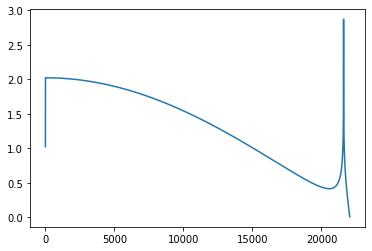

In [7]:
plt.plot(x_fft, 2.0/num_samples * np.abs(fft_sig[:num_samples//2]))

In [8]:
def do_demodulation(sig, fs, fm, ylimit_fft=1.2, ylimit_sig=1):
    f_modulation = fm
    fs = fs
    num_samples = fs
    length = 1/fs
    sig = sig[:num_samples]
    
    amp_modulation = 1
    phase_modulation = 0

    x = np.linspace(0.0, num_samples*length, num_samples)

    cos_modulation = amp_modulation*np.cos(2*np.pi*f_modulation*(x)+phase_modulation)
    cos_modulated = sig*cos_modulation

    cutoff = f_modulation*64/(2*np.pi*75) ## Q of 12
    order = 3

    signal_filtered = butter_lowpass_filter(cos_modulated, cutoff, fs, order)

    cos_demod = signal_filtered*cos_modulation

    plot_waves = {"x": x, "y":[sig, cos_demod], "legends": ["signal", "cos_demod"], 
                 "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1*ylimit_sig,ylimit_sig)}

    fft_sig, x_fft = get_fft(sig,length,num_samples)
    fft_modulation = scipy.fftpack.fft(cos_modulation)
    fft_modulated = scipy.fftpack.fft(cos_modulated)
    fft_filtered = scipy.fftpack.fft(signal_filtered)
    fft_demod = scipy.fftpack.fft(cos_demod)

    plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod[:num_samples//2])], 
                "legends": ["signal", "modulation", "modulated", "filtered", "demod"], "xlabel": "frequency", "ylabel": "amp", 
                "xlim": (0,3200), "ylim": (0,ylimit_fft)}

#     plotting(plot_waves)
#     plotting(plot_fft)
    
    sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)
    sin_modulated = sig*sin_modulation

    cutoff = f_modulation*64/(2*np.pi*75) ## Q of 12
    order = 3

    signal_filtered = butter_lowpass_filter(sin_modulated, cutoff, fs, order)

    sin_demod = signal_filtered*sin_modulation

    plot_waves = {"x": x, "y":[sig, sin_demod], "legends": ["signal", "sin_demod"], 
                 "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1*ylimit_sig,ylimit_sig)}

    fft_sig, x_fft = get_fft(sig,length,num_samples)
    fft_modulation = scipy.fftpack.fft(sin_modulation)
    fft_modulated = scipy.fftpack.fft(sin_modulated)
    fft_filtered = scipy.fftpack.fft(signal_filtered)
    fft_demod = scipy.fftpack.fft(sin_demod)

    plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulation[:num_samples//2]), 2.0/num_samples * np.abs(fft_modulated[:num_samples//2]), 2.0/num_samples * np.abs(fft_filtered[:num_samples//2]), 2.0/num_samples * np.abs(fft_demod[:num_samples//2])], 
                "legends": ["signal", "modulation", "modulated", "filtered", "demod"], "xlabel": "frequency", "ylabel": "amp", 
                "xlim": (0,3200), "ylim": (0,ylimit_fft)}

#     plotting(plot_waves)
#     plotting(plot_fft)

    demod = sin_demod+cos_demod

    plot_waves = {"x": x, "y":[demod], "legends": ["demod"], 
                 "xlabel": "time", "ylabel": "amp", "xlim": (0,0.02), "ylim": (-1*ylimit_sig,ylimit_sig)}

    fft_sig, x_fft = get_fft(demod,length,num_samples)

    plot_fft = {"x": x_fft, "y": [2.0/num_samples * np.abs(fft_sig[:num_samples//2])],
                "legends": ["demod_summed"], "xlabel": "frequency", "ylabel": "amp", 
                "xlim": (0,15000), "ylim": (0,ylimit_fft)}

#     plotting(plot_waves)
    plotting(plot_fft)

In [9]:
from matplotlib.pyplot import figure
def plotting(data):
    figure(figsize=(20, 6), dpi=80)
    for i in range(len(data["y"])):
        plt.plot(data["x"],data["y"][i],label=data["legends"][i])
    plt.ylabel(data["ylabel"])
    plt.xlabel(data["xlabel"])
    plt.ylim(data["ylim"])
    plt.xlim(data["xlim"])
    plt.grid()
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [10]:
do_demodulation(sig, fs, f_modulation)

NameError: name 'f_modulation' is not defined

In [11]:
starting_fm = [7902, 7040, 6271, 5587, 5274, 4698, 4186]
single_bank_fm = []
for i in range(8):
    single_bank_fm.append(starting_fm[0]/(2**i))

[7902.0, 3951.0, 1975.5, 987.75, 493.875, 246.9375, 123.46875, 61.734375]
[3219.5644423991216, 1609.7822211995608, 804.8911105997804, 402.4455552998902, 201.2227776499451, 100.61138882497255, 50.305694412486275, 25.152847206243138]


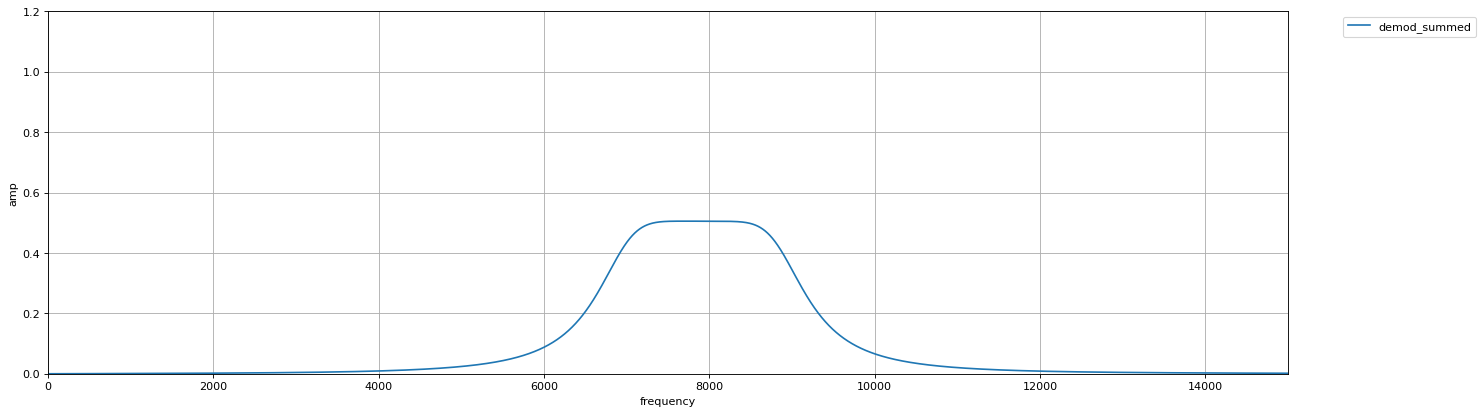

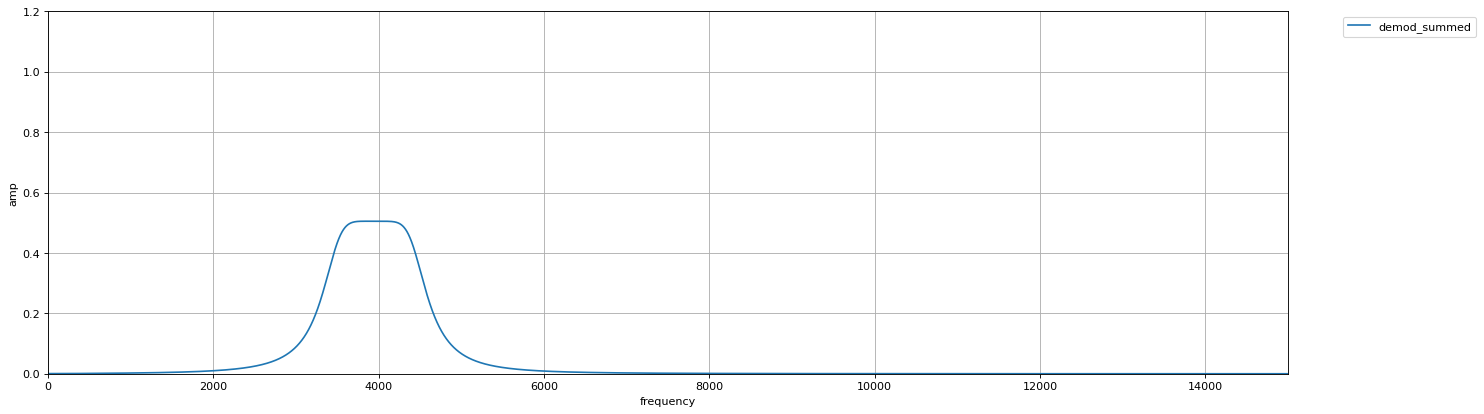

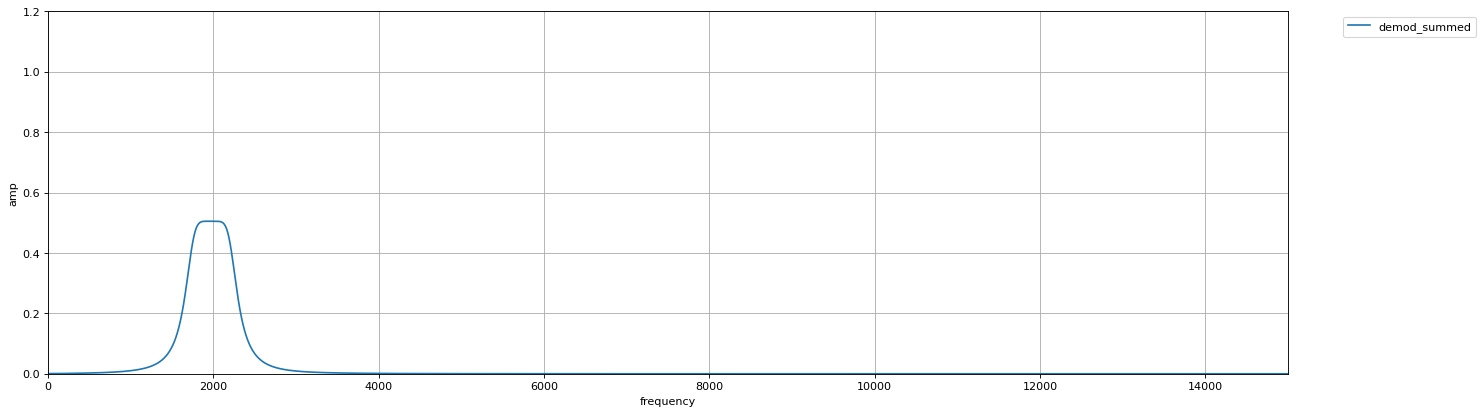

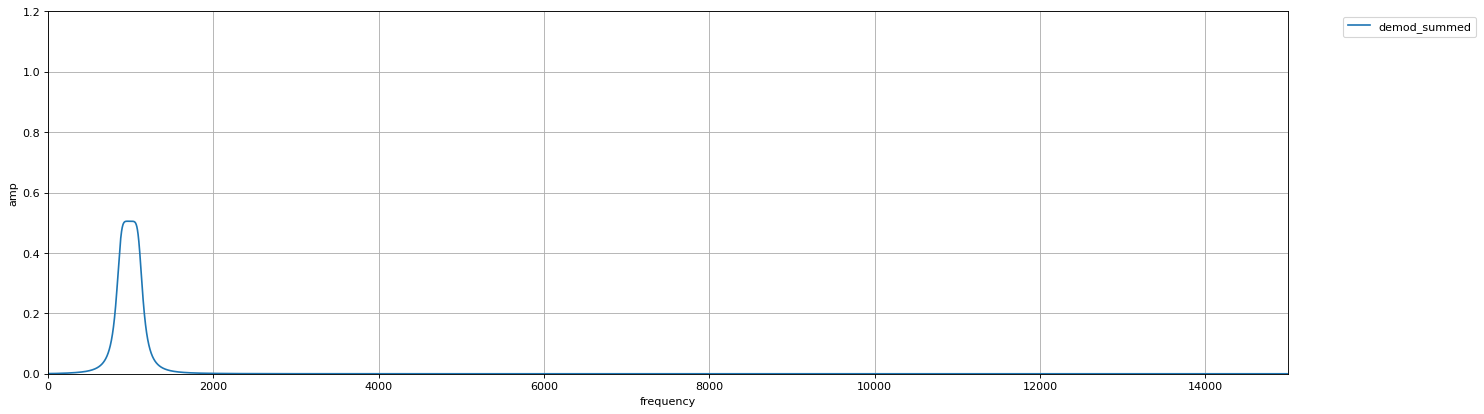

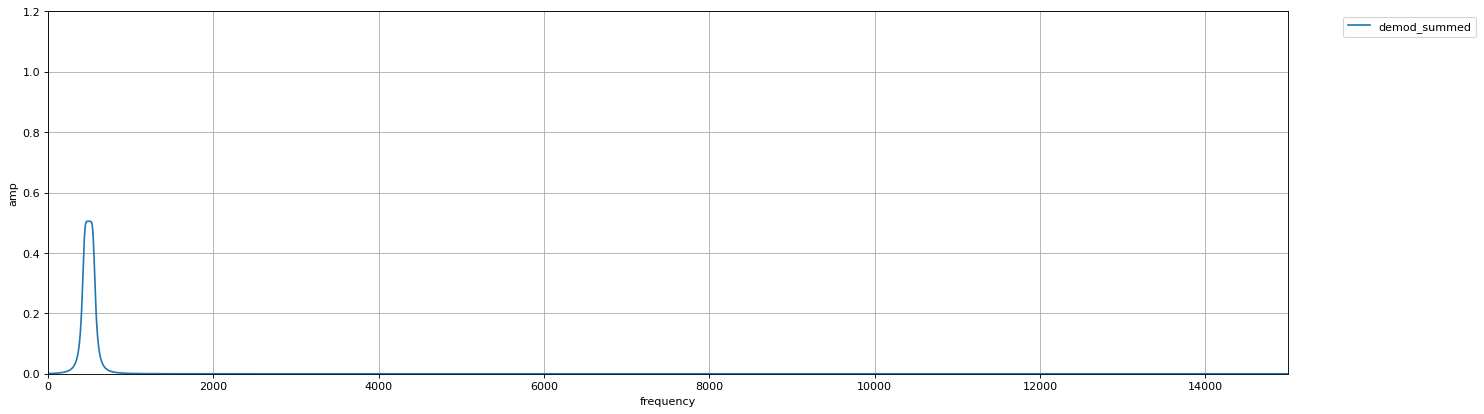

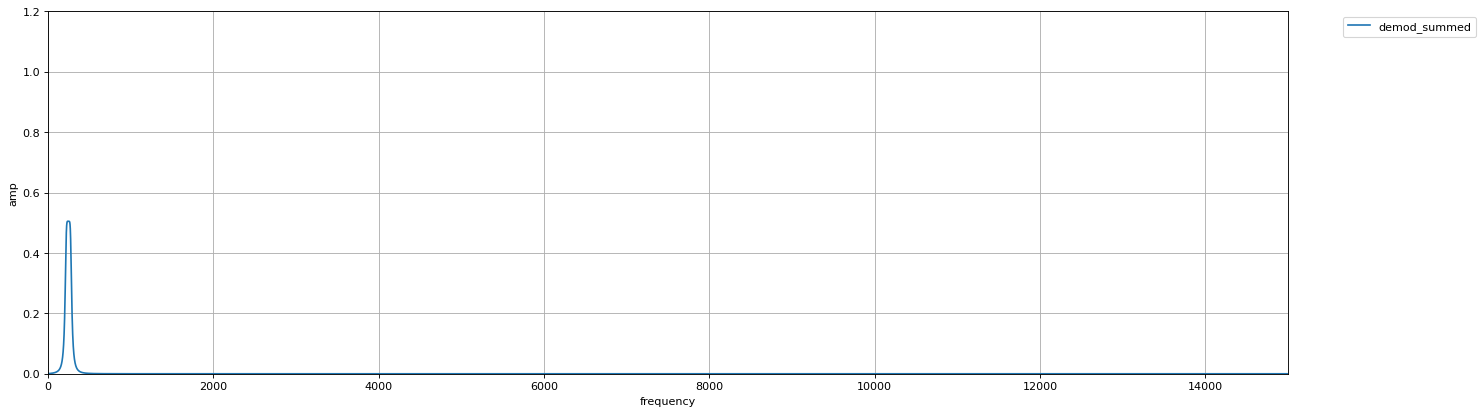

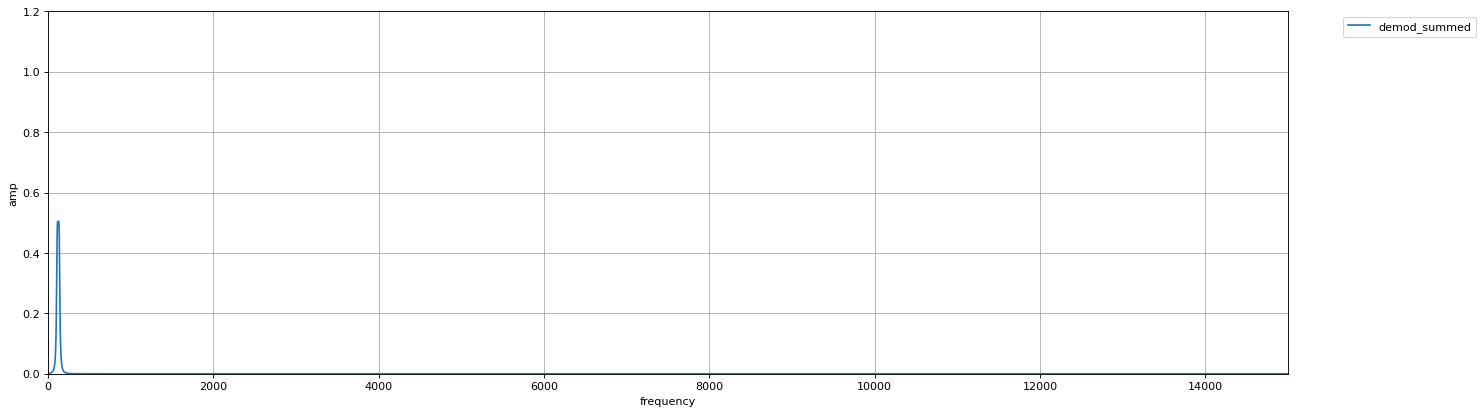

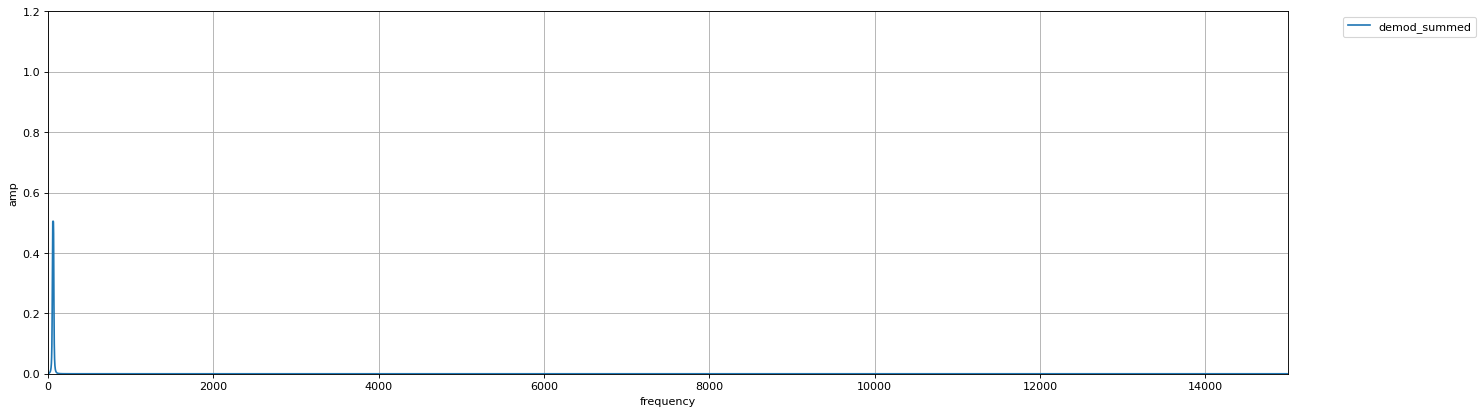

In [12]:
print(single_bank_fm)
print([i*256/(2*np.pi*100) for i in single_bank_fm])
for i in single_bank_fm:
    do_demodulation(sig, fs, i)

In [112]:
def demod_hpf(sig, fs, f_arr):
#     for j in range(len(starting_fm)):
#         single_bank_fm = []
#         for i in range(8):
#             single_bank_fm.append(starting_fm[j]/(2**i))
#         demod_hpf(sig, fs, single_bank_fm)

    figure(figsize=(15, 6), dpi=80)
    for i in f_arr:
        f_modulation = i
        fs = fs
        num_samples = fs
        length = 1/fs
#         print(len(sig))
#         sig = sig[:num_samples]
        num_samples = int(num_samples)
        amp_modulation = 1
        phase_modulation = 0

        cutoff = f_modulation*256/(2*np.pi*300) ## Q of 12
#         print("cutoff: ", cutoff)
        cutoff_high = 1
        order = 3

        x = np.linspace(0.0, num_samples*length, num_samples)

        cos_modulation = amp_modulation*np.cos(2*np.pi*f_modulation*(x)+phase_modulation)
        sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)

        cos_mod = sig*cos_modulation
        sin_mod = sig*sin_modulation
        signal_filtered_cos = butter_lowpass_filter(cos_mod, cutoff, fs, order)
        signal_filtered_cos_high = butter_highpass_filter(signal_filtered_cos, cutoff_high, fs, 1)
        
        signal_filtered_sin = butter_lowpass_filter(sin_mod, cutoff, fs, order)
        signal_filtered_sin_high = butter_highpass_filter(signal_filtered_sin, cutoff_high, fs, 1)
        
        cos_demod = signal_filtered_cos_high*cos_modulation
        sin_demod = signal_filtered_sin_high*sin_modulation
        
        demod = cos_demod+sin_demod
        
        fft_sig, x_fft = get_fft(demod,length,num_samples)
        plt.plot(x_fft, 2.0/num_samples * np.abs(fft_sig[:num_samples//2]), label=i)

    plt.xlim(0,1000)
    plt.ylim(0,0.7)
#     plt.legend(loc="upper left")
    plt.grid()
    title = "plot for "+str(single_bank_fm[0])+" 1_100_Hz.png"
    plt.savefig(title)


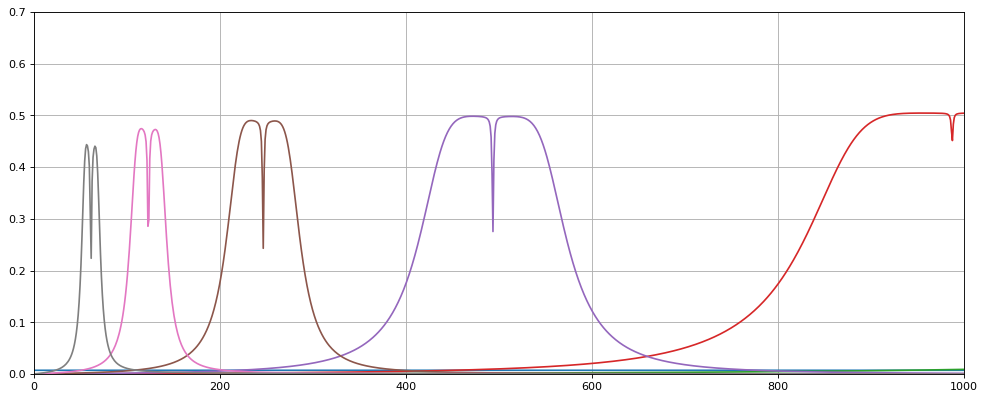

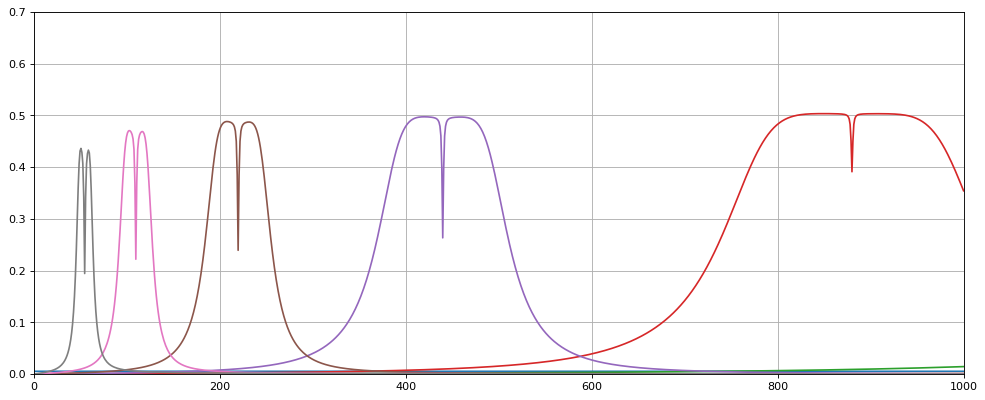

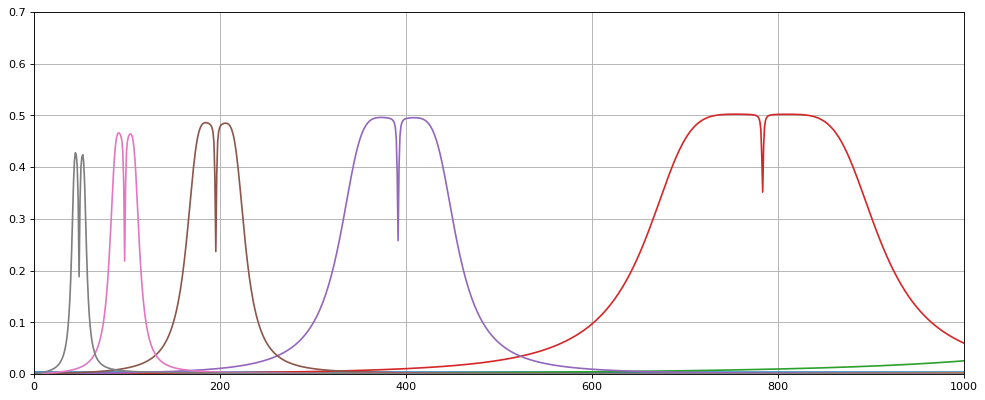

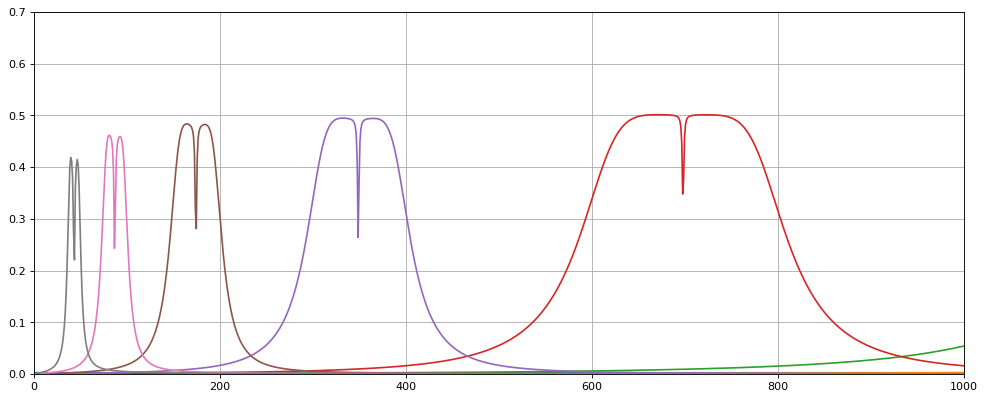

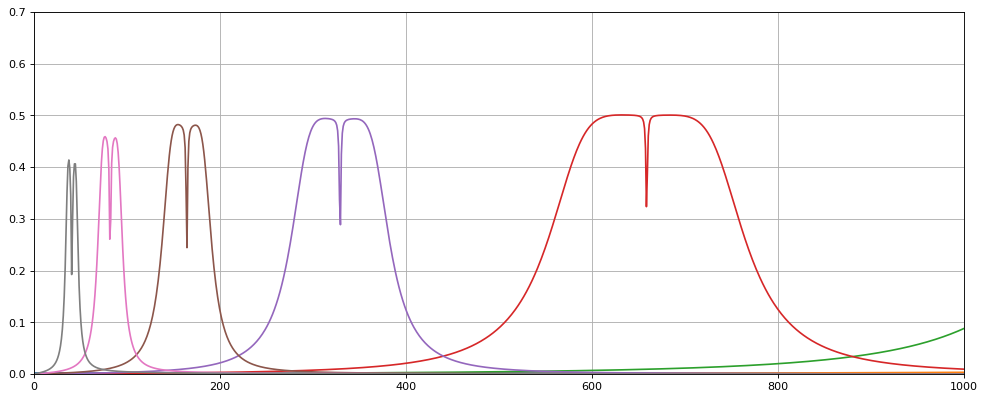

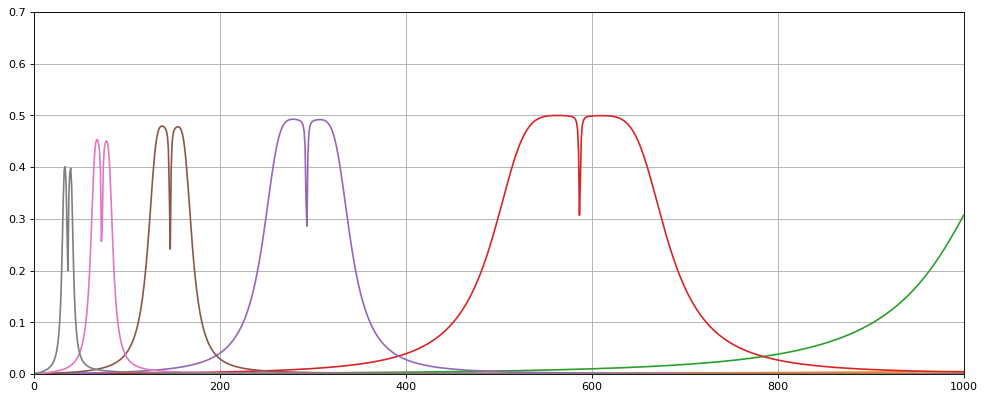

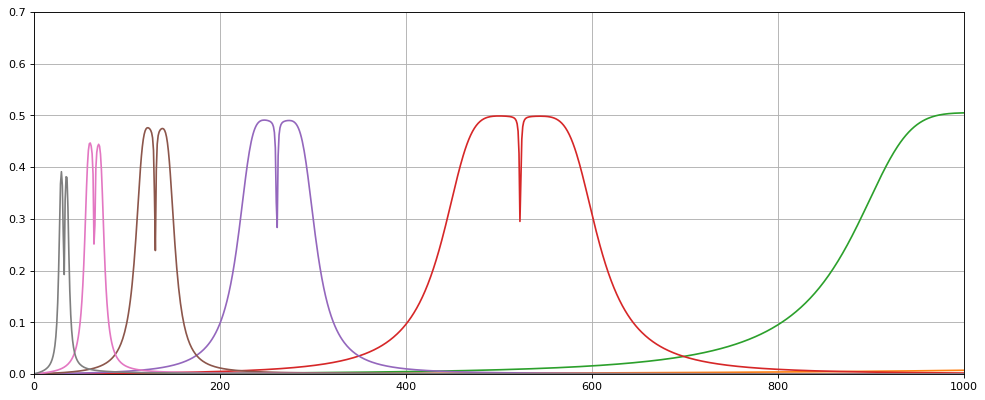

In [113]:
for j in range(len(starting_fm)):
    single_bank_fm = []
    for i in range(8):
        single_bank_fm.append(starting_fm[j]/(2**i))
    demod_hpf(sig, fs, single_bank_fm)


In [145]:
audio, sr = librosa.load('rhythms.wav')
num_samples = 22050
length = 1/sr

In [108]:
def demod_hpf2(sig, fs, starting_fm):

    figure(figsize=(15, 6), dpi=80)
    plt_color = ['b', 'g', 'r', 'y', 'c', 'm', 'k']
    color = 0
    for j in range(len(starting_fm)):
        
        single_bank_fm = []
        for i in range(8):
            single_bank_fm.append(starting_fm[j]/(2**i))
#         demod_hpf(sig, fs, single_bank_fm)
        f_arr = single_bank_fm
        for i in f_arr:
            f_modulation = i
            fs = fs
            num_samples = fs
            length = 1/fs
            num_samples = int(num_samples)
            amp_modulation = 1
            phase_modulation = 0

            cutoff = f_modulation*256/(2*np.pi*300)
            cutoff_high = 1
            order = 3

            x = np.linspace(0.0, num_samples*length, num_samples)

            cos_modulation = amp_modulation*np.cos(2*np.pi*f_modulation*(x)+phase_modulation)
            sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)

            cos_mod = sig*cos_modulation
            sin_mod = sig*sin_modulation
            signal_filtered_cos = butter_lowpass_filter(cos_mod, cutoff, fs, order)
#             signal_filtered_cos_high = butter_highpass_filter(signal_filtered_cos, cutoff_high, fs, 1)
            signal_filtered_cos_high = signal_filtered_cos

            signal_filtered_sin = butter_lowpass_filter(sin_mod, cutoff, fs, order)
#             signal_filtered_sin_high = butter_highpass_filter(signal_filtered_sin, cutoff_high, fs, 1)
            signal_filtered_sin_high = signal_filtered_sin

            cos_demod = signal_filtered_cos_high*cos_modulation
            sin_demod = signal_filtered_sin_high*sin_modulation

            demod = cos_demod+sin_demod

            fft_sig, x_fft = get_fft(demod,length,num_samples)
            plt.fill(x_fft, 10*np.log(2.0/num_samples * np.abs(fft_sig[:num_samples//2])), facecolor='blue')
#             plt.plot(x_fft, 2.0/num_samples * np.abs(fft_sig[:num_samples//2]), label=i, color=plt_color[color])
        color+=1

    plt.xlim(0,10000)
    plt.ylim(-20,0)
#     plt.legend(loc="upper left")
    plt.grid()
    plt.savefig("overlap no hpf.png")

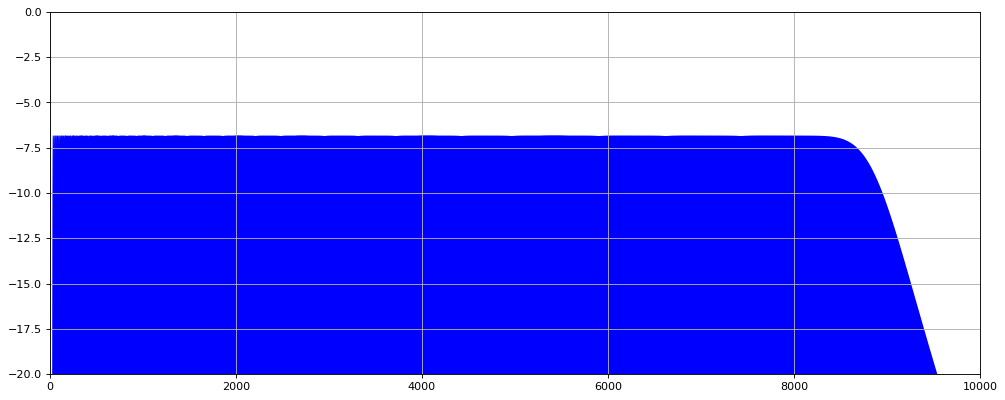

In [109]:
demod_hpf2(sig, fs, starting_fm)

In [110]:
def demod_hpf3(sig, fs, starting_fm):

    figure(figsize=(15, 6), dpi=80)
    plt_color = ['b', 'g', 'r', 'y', 'c', 'm', 'k']
    color = 0
    for j in range(len(starting_fm)):
        
        single_bank_fm = []
        for i in range(8):
            single_bank_fm.append(starting_fm[j]/(2**i))
#         demod_hpf(sig, fs, single_bank_fm)
        f_arr = single_bank_fm
        for i in f_arr:
            f_modulation = i
            fs = fs
            num_samples = fs
            length = 1/fs
            num_samples = int(num_samples)
            amp_modulation = 1
            phase_modulation = 0

            cutoff = f_modulation*256/(2*np.pi*300)
            cutoff_high = 1
            order = 3

            x = np.linspace(0.0, num_samples*length, num_samples)

            cos_modulation = amp_modulation*np.cos(2*np.pi*f_modulation*(x)+phase_modulation)
            sin_modulation = amp_modulation*np.sin(2*np.pi*f_modulation*(x)+phase_modulation)

            cos_mod = sig*cos_modulation
            sin_mod = sig*sin_modulation
            signal_filtered_cos = butter_lowpass_filter(cos_mod, cutoff, fs, order)
            signal_filtered_cos_high = butter_highpass_filter(signal_filtered_cos, cutoff_high, fs, 1)
#             signal_filtered_cos_high = signal_filtered_cos

            signal_filtered_sin = butter_lowpass_filter(sin_mod, cutoff, fs, order)
            signal_filtered_sin_high = butter_highpass_filter(signal_filtered_sin, cutoff_high, fs, 1)
#             signal_filtered_sin_high = signal_filtered_sin

            cos_demod = signal_filtered_cos_high*cos_modulation
            sin_demod = signal_filtered_sin_high*sin_modulation

            demod = cos_demod+sin_demod

            fft_sig, x_fft = get_fft(demod,length,num_samples)
            plt.fill(x_fft, 10*np.log(2.0/num_samples * np.abs(fft_sig[:num_samples//2])), facecolor='green')
#             plt.plot(x_fft, 2.0/num_samples * np.abs(fft_sig[:num_samples//2]), label=i, color=plt_color[color])
        color+=1

    plt.xlim(0,10000)
    plt.ylim(-20,0)
#     plt.legend(loc="upper left")
    plt.grid()
    plt.savefig("overlap.png")

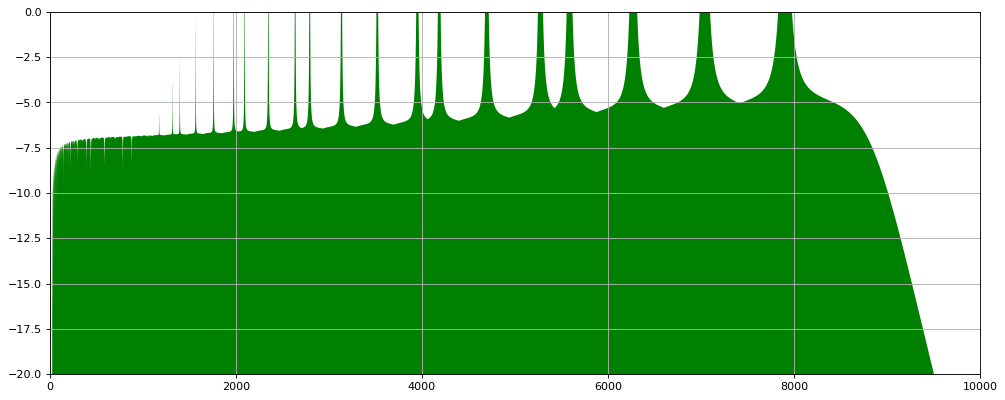

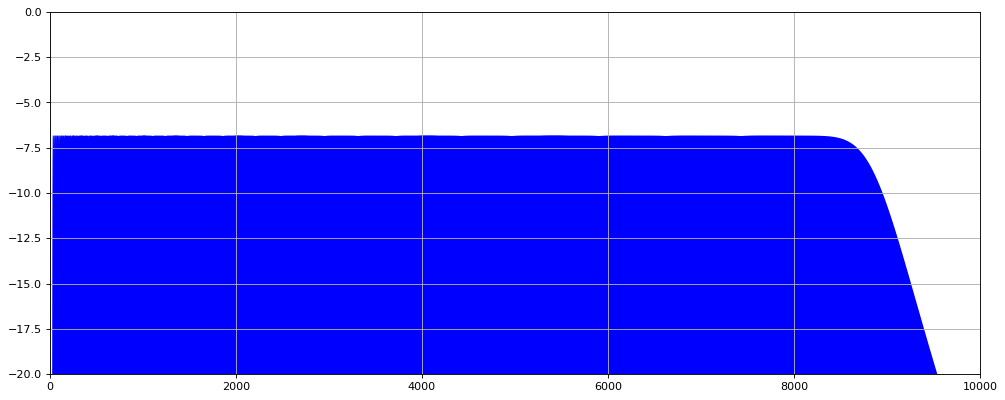

In [111]:
demod_hpf3(sig, fs, starting_fm)
demod_hpf2(sig, fs, starting_fm)

In [96]:
## All calculations
# R1C1, R2C2, R3C3. R3 = 1/(phi*min_cap3) C3 = min_cap3*cap_ratio
# R2 = R3/k, R1 = R2/k || min_cap2 = k*min_cap3, min_cap1 = k*min_cap2
oversampling = 256
min_cap3 = 10e-15
highest_f = 10000
phi = oversampling*highest_f
cap_ratio = 300
k = 2

### R3, C3
cs3 = min_cap3
c3 = cap_ratio*cs3
r3 = 1/(phi*cs3)
pole3 = 1/(2*np.pi*r3*c3)

### R2, C2
cs2 = k*cs3
c2 = k*c3
r2 = r3/k
pole2 = 1/(2*np.pi*r2*c2)

### R1, C1
cs1 = k*cs2
c1 = k*c2
r1 = r2/k
pole1 = 1/(2*np.pi*r1*c1)

print("Big Caps: ", str(round(c1*1e12, 2)), " pF, ", str(round(c2*1e12, 2)), " pF, ", str(round(c3*1e12, 2)), " pF")
print("Small Caps: ", str(round(cs1*1e15, 2)), " fF, ", str(round(cs2*1e15, 2)), " fF, ", str(round(cs3*1e15, 2)), " fF")
print("Resistances: ", str(round(r1*1e-6, 2)), " MOhm, ", str(round(r2*1e-6, 2)), " MOhm, ", str(round(r3*1e-6, 2)), " MOhm")
# print("Poles: ", str(round(pole1, 2)) + " Hz", str(round(pole2, 2)) + " Hz", str(round(pole3, 2)) + " Hz")
print("Q: ", round(2*highest_f/pole1, 2))

Big Caps:  12.0  pF,  6.0  pF,  3.0  pF
Small Caps:  40.0  fF,  20.0  fF,  10.0  fF
Resistances:  9.77  MOhm,  19.53  MOhm,  39.06  MOhm
Q:  14.73


In [99]:
## Considering average capacitance of 2fF/um^2
max_cap = 30*30*2*2
print(str(round(max_cap, 2))+" fF")

3600 fF


In [104]:
12000//2

6000

In [105]:
30*20*2*5

6000